In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel('Glucose_Data.xlsx')
df

,GlucoseLevel,ArduinoReading,Voltage
0,90,85,0.415039
1,90,87,0.424805
2,90,91,0.444336
3,90,88,0.429688
4,90,83,0.405273
...,...,...,...
85,91,91,0.444336
86,91,91,0.444336
87,91,84,0.410156
88,91,83,0.405273


In [3]:
df.head()

,GlucoseLevel,ArduinoReading,Voltage
0,90,85,0.415039
1,90,87,0.424805
2,90,91,0.444336
3,90,88,0.429688
4,90,83,0.405273


In [4]:
df.tail()

,GlucoseLevel,ArduinoReading,Voltage
85,91,91,0.444336
86,91,91,0.444336
87,91,84,0.410156
88,91,83,0.405273
89,91,87,0.424805


In [5]:
df.describe()

,GlucoseLevel,ArduinoReading,Voltage
count,90.000000,90.000000,90.000000
mean,115.888889,99.733333,0.486979
std,35.570612,18.575567,0.090701
min,88.000000,80.000000,0.390625
25%,91.000000,88.000000,0.429688
50%,102.000000,93.000000,0.454102
75%,111.000000,100.750000,0.491943
max,191.000000,149.000000,0.727539


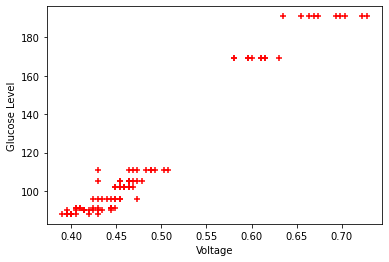

In [6]:
plt.xlabel('Voltage')
plt.ylabel('Glucose Level')
plt.scatter(df.Voltage,df.GlucoseLevel,color='red',marker='+')

In [7]:
X = df['Voltage']
Y = df['GlucoseLevel']
X = np.array(X)
Y = np.array(Y)
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [8]:
X.shape, Y.shape

((90, 1), (90, 1))

In [9]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data
Y = df['GlucoseLevel']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20,random_state=72)

In [11]:
X_train.shape

(72, 1)

In [12]:
X_test.shape

(18, 1)

In [13]:
print(X)

[[-0.79760008]
 [-0.68932858]
 [-0.47278557]
 [-0.63519282]
 [-0.90587159]
 [-0.79760008]
 [-0.74346433]
 [-0.79760008]
 [-0.58105707]
 [-1.01414309]
 [-0.63519282]
 [-0.36451406]
 [-0.25624256]
 [-0.20210681]
 [-0.25624256]
 [-0.25624256]
 [-0.14797106]
 [-0.36451406]
 [-0.0938353 ]
 [-0.25624256]
 [ 1.2595585 ]
 [ 1.04301549]
 [ 1.42196576]
 [ 1.20542275]
 [ 1.04301549]
 [ 1.36783   ]
 [ 1.36783   ]
 [ 1.42196576]
 [ 1.20542275]
 [ 1.58437301]
 [ 2.01745903]
 [ 1.85505177]
 [ 1.63850876]
 [ 2.07159478]
 [ 1.96332328]
 [ 2.66708805]
 [ 2.6129523 ]
 [ 2.28813779]
 [ 2.39640929]
 [ 2.34227354]
 [-0.63519282]
 [-0.96000734]
 [-0.90587159]
 [-0.96000734]
 [-0.96000734]
 [-1.01414309]
 [-0.96000734]
 [-0.74346433]
 [-1.06827884]
 [-1.01414309]
 [ 0.17684346]
 [ 0.0144362 ]
 [ 0.06857195]
 [ 0.0144362 ]
 [-0.14797106]
 [-0.63519282]
 [-0.25624256]
 [-0.20210681]
 [-0.03969955]
 [ 0.23097921]
 [-0.25624256]
 [-0.20210681]
 [-0.41864982]
 [-0.36451406]
 [-0.41864982]
 [-0.31037831]
 [-0.31037

In [14]:
lr = LinearRegression(fit_intercept = True)
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
Y_prediction = lr.predict(X_test)
mse = mean_squared_error(Y_test,Y_prediction)
print(mse)

58.50832239675896


In [16]:
print('Linear Model Coefficient (m) : ', lr.coef_)
print('Linear Model Coefficient (b) : ', lr.intercept_)

Linear Model Coefficient (m) :  [35.01011089]
Linear Model Coefficient (b) :  115.8122208445489


In [17]:
new_value = [[0.5000]]
new_prediction = lr.predict(new_value)
new_prediction

array([133.31727629])